# Assignment 2
### Understanding Uncertainty
### Due 9/12
#### Name: Shaveen Saadee

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

**Answer:**
I would define the most profitable item to be any item that is selling at a greater rate than they are producing, in addition to a maximized retail price in relation to the cost of production.

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns

In [46]:
iowa = pd.read_csv('/Users/shaveen/understanding_uncertainty/data/iowa.csv')
iowa

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159899,INV-20689000058,07/17/2019,2565,HY-VEE FOOD STORE #1636 / SPENCER,51301,AMERICAN CORDIALS & LIQUEURS,LUXCO INC,76488,PARAMOUNT AMARETTO,1750,8.07,12.11,6,72.66
159900,S05071400061,04/16/2012,3583,MAC'S LIQUOR AND VIDEOS,50060,COFFEE LIQUEURS,PERNOD RICARD USA/AUSTIN NICHOLS,67527,KAHLUA COFFEE LIQUEUR,1000,14.81,22.22,1,22.22
159901,INV-22880300009,10/29/2019,3896,SMOKIN' JOE'S #18 TOBACCO AND LIQUOR OUTLET,52240,IMPORTED DRY GINS,DIAGEO AMERICAS,28866,TANQUERAY GIN,750,13.50,20.25,2,40.50
159902,INV-58180900067,05/05/2023,4057,TEQUILA'S LIQUOR STORE,50316,NEUTRAL GRAIN SPIRITS FLAVORED,OLE SMOKY DISTILLERY LLC,80363,OLE SMOKY BANANA PUDDING CREAM MOONSHINE,750,13.00,19.50,3,58.50


In [47]:
iowa['Profit'] = (iowa['State Bottle Retail'] - iowa['State Bottle Cost']) * iowa['Bottles Sold']
iowa.head()

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Profit
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28,18.10
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12,29.04
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66,46.80
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72,47.28
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00,15.00


<Axes: xlabel='Profit', ylabel='Item Description'>

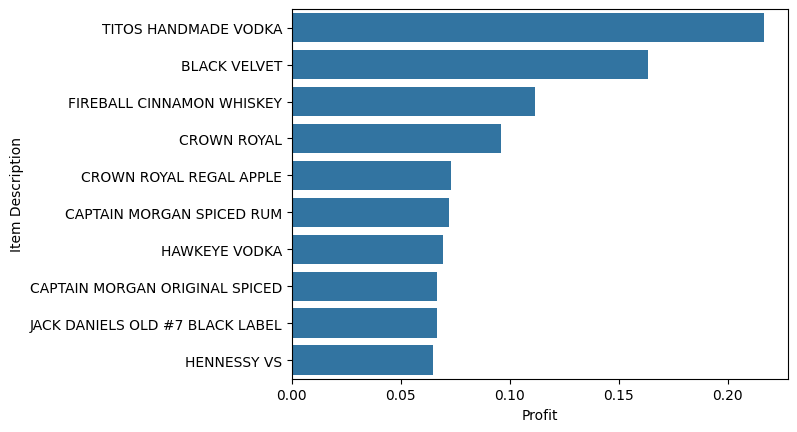

In [48]:
bottles = (iowa.loc[:,['Profit','Item Description']]
         .groupby('Item Description')
         .sum()
         .sort_values(by='Profit',ascending=False) )

top_bottles = bottles[:10]
sns.barplot(top_bottles['Profit']/np.sum(top_bottles['Profit']), orient = 'h')

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [49]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

subt = x-y
subt

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

When attempting to subtract the two vectors (x and y), an error occurs that states "operands could not be broadcast together with shapes (3,) (2,).

In [50]:
reshape = x.reshape(-1,1)-y.reshape(1,-1)
reshape

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

Using .reshape provided an output of array([[-1, -4], [ 1, -2], [ 3,  0]]).

In [51]:
reshape2 = x.reshape(1,-1)-y.reshape(-1,1)
reshape2

array([[-1,  1,  3],
       [-4, -2,  0]])

In the previous answer we received an output of array([[-1, -4], [ 1, -2], [ 3,  0]]). In reshape2, however, we received an array of only 2 elements: array([[-1,  1,  3], [-4, -2,  0]]).

In [52]:
x = np.array([1,3,5])
y = np.array([2,5])

arrays = []
for i in range(len(x)):
    array = []
    for j in range(len(y)):
        array.append(x[i]-y[j])
    arrays.append(array)

result1 = np.array(arrays)
result1

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [53]:
x = np.array([1,3,5])
y = np.array([2,5])

arrays = []
for i in range(len(y)):
    array = []
    for j in range(len(x)):
        array.append(x[j]-y[i])
    arrays.append(array)

result2 = np.array(arrays)
result2

array([[-1,  1,  3],
       [-4, -2,  0]])

In [54]:
#`x.reshape(1,-1)` and `x.reshape(-1,1)` indicate the number of columns and rows we want. 
# In `x.reshape(1,-1),` this tells numpy we want 1 row. This spreads x horizontally if used in operations.
# In `x.reshape(-1,1),` this tells numpy we want 1 column. This spreads x vertically if used in operations.

# Thus `x.reshape(1,-1)` looks like:
#     1     3     5
# 2  1-2   3-2   5-2
# 5  1-5   3-5   5-5

# Resulting in array([[-1,  1,  3], [-4, -2,  0]])


# `x.reshape(-1,1)` looks like:
#    2     5
# 1  1-2   1-5
# 3  3-2   3-5
# 5  5-2   5-5

# Resulting in array([[-1, -4], [ 1, -2], [ 3,  0]])

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

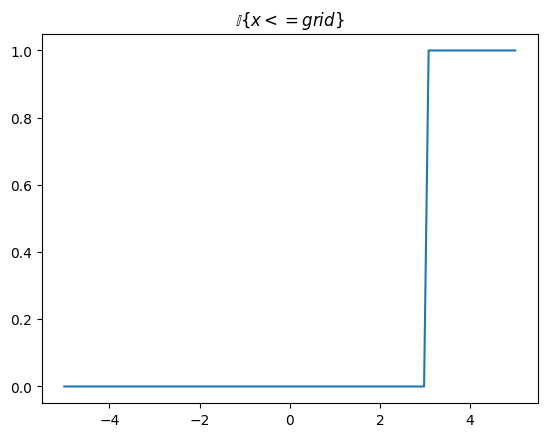

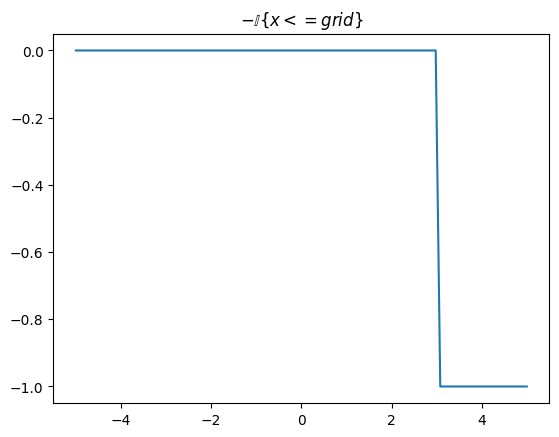

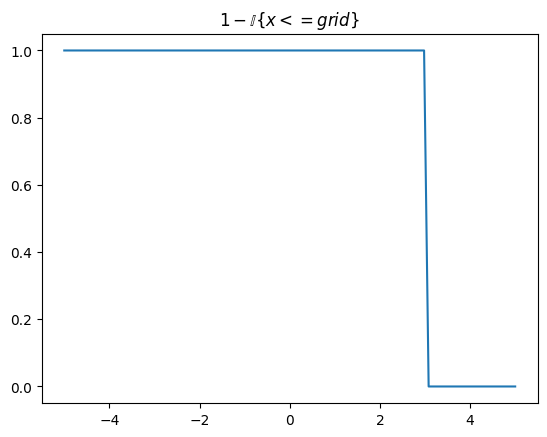

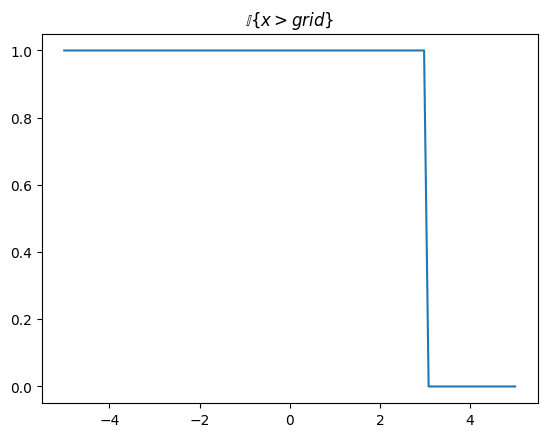

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

grid = np.linspace(-5,5,100)

def ind_ls(x,grid):
    return (x <= grid).astype(int)

def ind_gr(x,grid):
    return (x>grid).astype(int)

sns.lineplot( y = ind_ls(3,grid), x=grid).set(title='$ \\mathbb{I}\\{x <= grid \\}$')
plt.show()

sns.lineplot( y = -ind_ls(3,grid), x=grid).set(title='$ -\\mathbb{I}\\{x <= grid \\}$')
plt.show()

sns.lineplot( y = 1-ind_ls(3,grid), x=grid).set(title='$ 1 - \\mathbb{I}\\{x <= grid \\}$')
plt.show()

sns.lineplot( y = ind_gr(3,grid), x=grid).set(title='$ \\mathbb{I}\\{x > grid \\}$')
plt.show()

The indicator I{x =< z} is 1 when x is less than or equal to z, and 0 when x is greater than z. Subtracting the indicator from 1 flips these values, so it now becomes 1 when x is greater than z, and 0 when x is less than or equal to z, as indicated by the graphs. This is why 1 - I{x =< z} = I{x > z}.

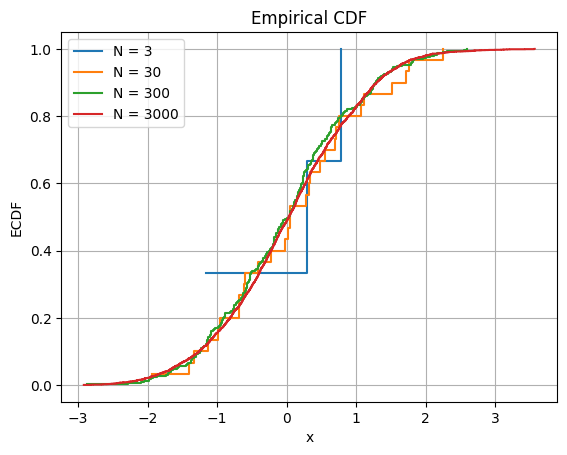

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def ecdf(x, plot=True, label=None):
    x = pd.Series(x)
    Z = np.sort(x.unique())
    compare = x.to_numpy().reshape(-1,1) <= Z.reshape(1,-1)
    ecdf = np.mean(compare, axis=0)

    if plot:
        plt.step(Z, ecdf, where='post', label=label)
        plt.xlabel('x')
        plt.ylabel('ECDF')
        plt.grid(True)

    return ecdf, Z

rng = np.random.default_rng(100)

for N in (3, 30, 300, 3000):
    X = rng.normal(0,1,N)
    ecdf(X, plot=True, label=f'N = {N}')

plt.title('Empirical CDF')
plt.legend()
plt.show()



4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [57]:
import pandas as pd
import seaborn as sns

def quantile(iowa, q):
    x = sorted(iowa)
    n = len(x)
    position = (n - 1) * q
    lower = int(position)
    upper = lower + 1
    if upper >= n:
        return x[lower]
    return x[lower] + (position - lower) * (x[upper] - x[lower])


In [58]:
def iqr_and_whiskers(iowa):
    q1 = quantile(iowa, 0.25)
    q3 = quantile(iowa, 0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    return q1, q3, iqr, lower_whisker, upper_whisker

In [59]:
def five_number_summary(iowa):
    data_sorted = sorted(iowa)
    q1, q3, iqr, lower_w, upper_w = iqr_and_whiskers(data_sorted)
    summary = {
        'min': min(data_sorted),
        'Q1': q1,
        'median': quantile(data_sorted, 0.5),
        'Q3': q3,
        'max': max(data_sorted),
        'IQR': iqr,
        'lower_whisker': lower_w,
        'upper_whisker': upper_w
    }
    return summary

In [60]:
def is_outlier(iowa):
    _, _, _, lower_w, upper_w = iqr_and_whiskers(iowa)
    return [(x < lower_w) or (x > upper_w) for x in iowa]

Five-number summary and IQR:
min: -1628.4
Q1: 36.550000000000004
median: 78.66
Q3: 152.88
max: 36720.0
IQR: 116.32999999999998
lower_whisker: -137.94499999999996
upper_whisker: 327.375

Outliers detected: 9534
Sales:
count    159904.000000
mean        146.931598
std         459.368723
min       -1628.400000
25%          36.550000
50%          78.660000
75%         152.880000
max       36720.000000
Name: Sale (Dollars), dtype: float64


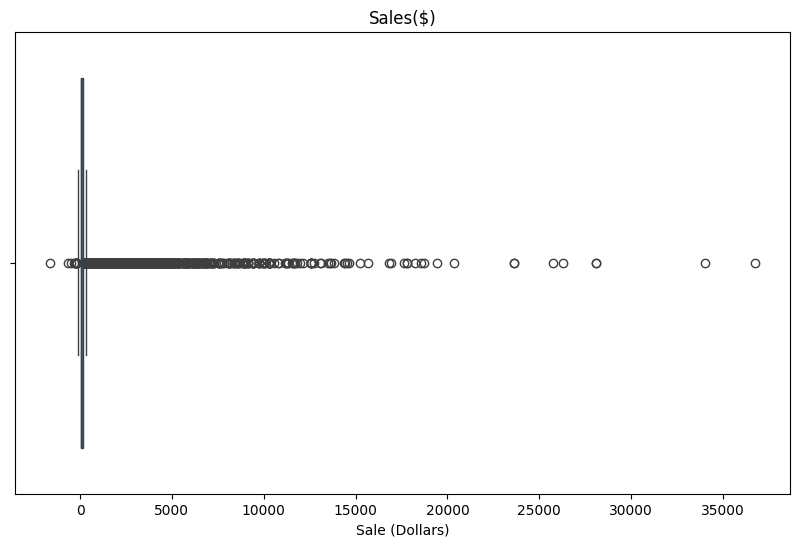

In [70]:
import matplotlib.pyplot as plt


sales = iowa['Sale (Dollars)'].dropna()

summary = five_number_summary(list(sales))
outliers = is_outlier(list(sales))

print("Five-number summary and IQR:")
for k, v in summary.items():
    print(f"{k}: {v}")

print(f"\nOutliers detected: {sum(outliers)}")


print("Sales:")
print(sales.describe())

plt.figure(figsize=(10, 6))
sns.boxplot(x=sales)
plt.title("Sales($)")
plt.show()


5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?